In [4]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
sns.set_style({'axes_labelcolor': 'white'})

In [6]:
x = pd.read_csv("C:/Users/Ian/Box Sync/Client/Baker Tilly/201901 ProdDev Initiative/"
                "2 - Work in Process/POIS-0202-Moixa/Data/scoredTrainingData.csv")

In [7]:
def Corr(feat_regx):
    df = x.filter(regex="{}.*".format(feat_regx), axis=1)
    data_corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
def performanceCorr(feat_regx):
    df1 = x.filter(regex="{}.*".format(feat_regx), axis=1)
    df = x[list(x.columns)[1:8]].join(df1)
    data_corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

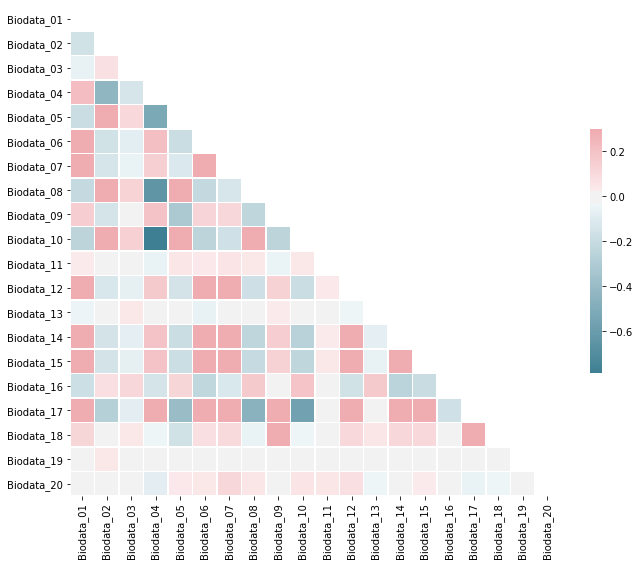

In [9]:
Corr('Biodata')

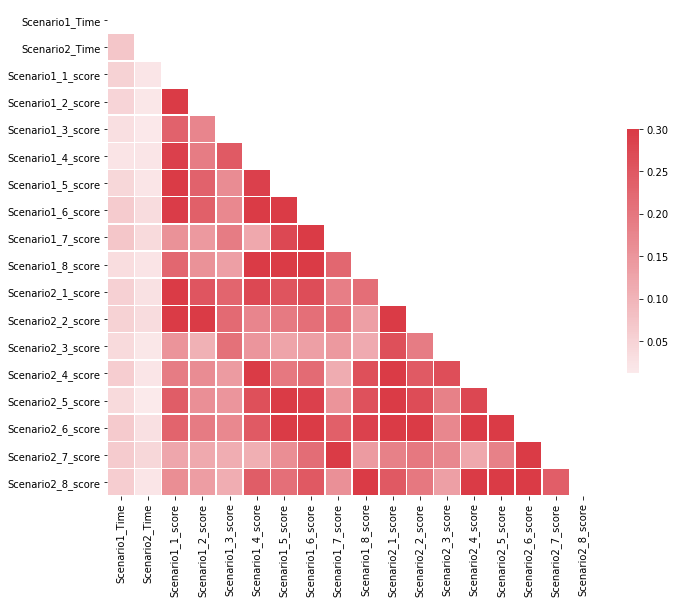

In [10]:
Corr('Scenario')

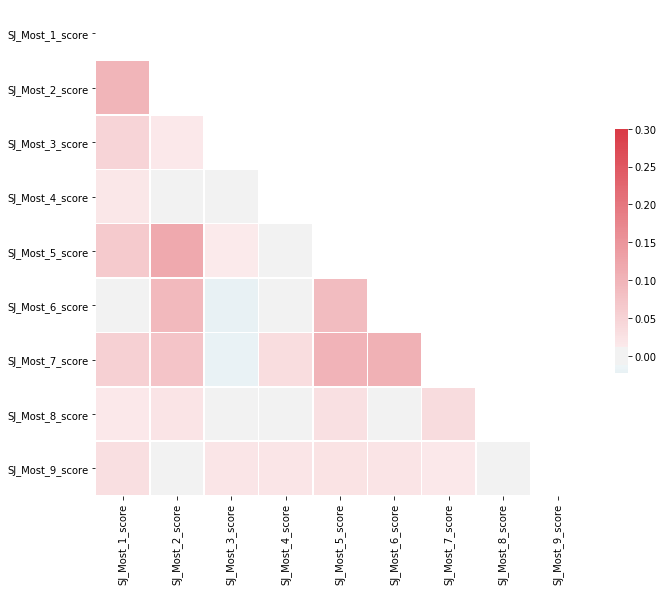

In [11]:
Corr('SJ_Most')

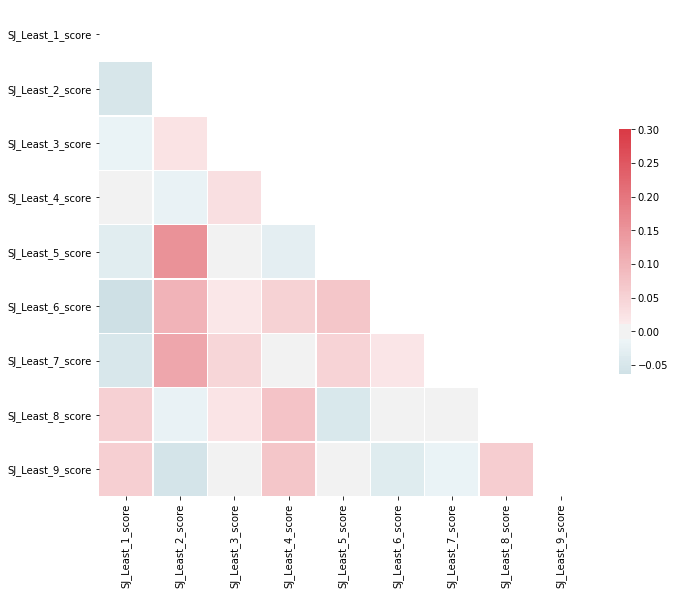

In [12]:
Corr('SJ_Least')

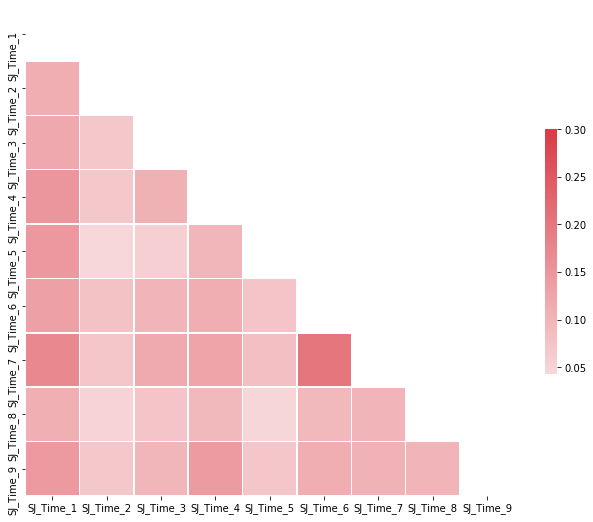

In [13]:
Corr('SJ_Time')

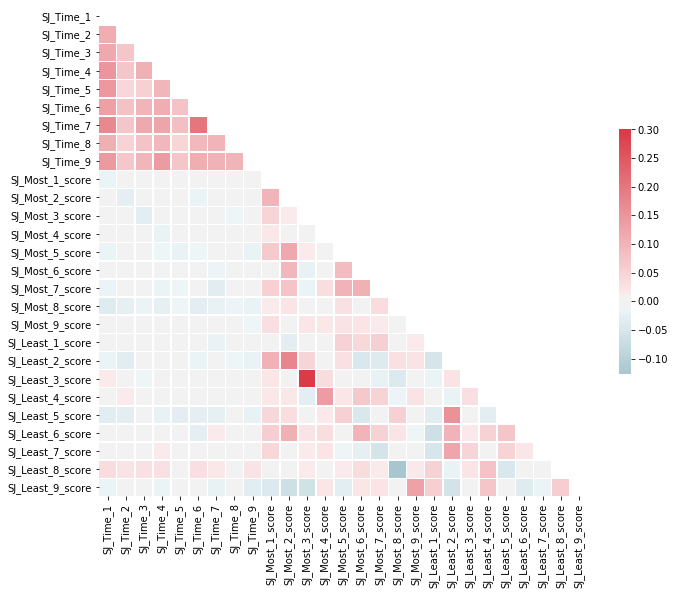

In [14]:
Corr('SJ_')

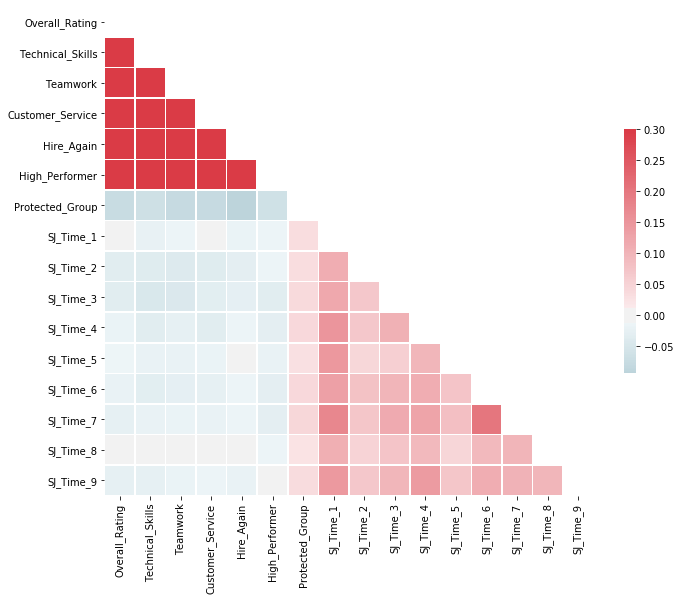

In [17]:
performanceCorr('SJ_Time')

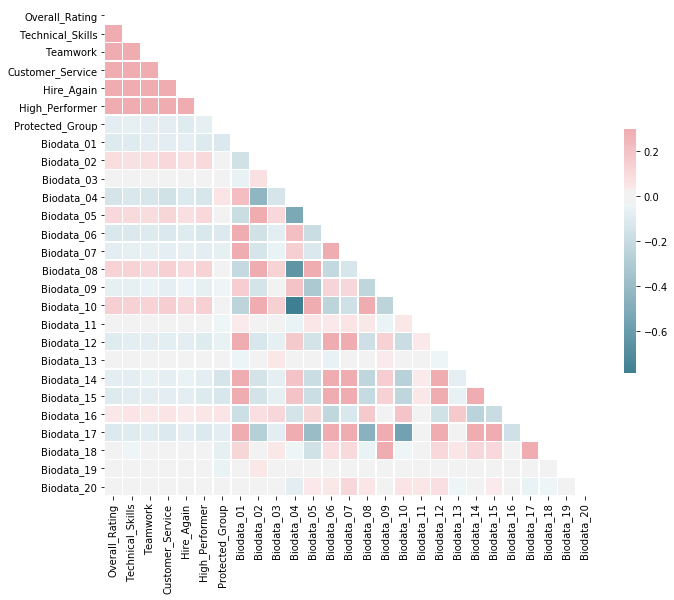

In [18]:
performanceCorr('Biodata')

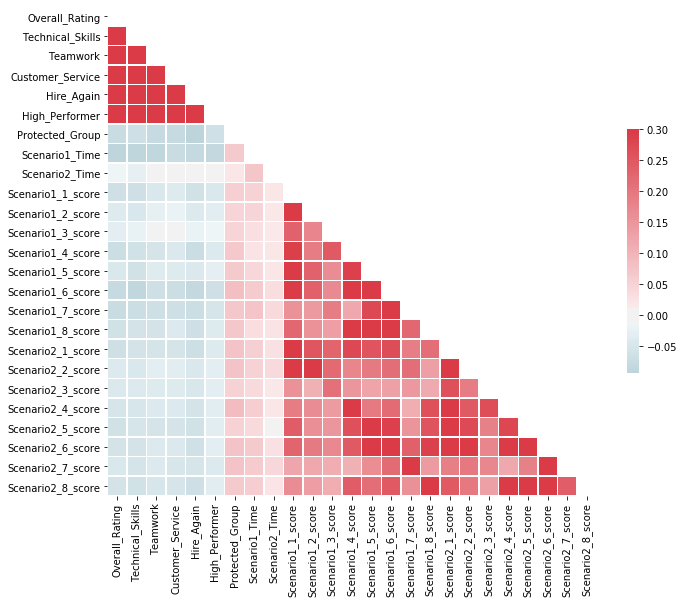

In [19]:
performanceCorr('Scenario')

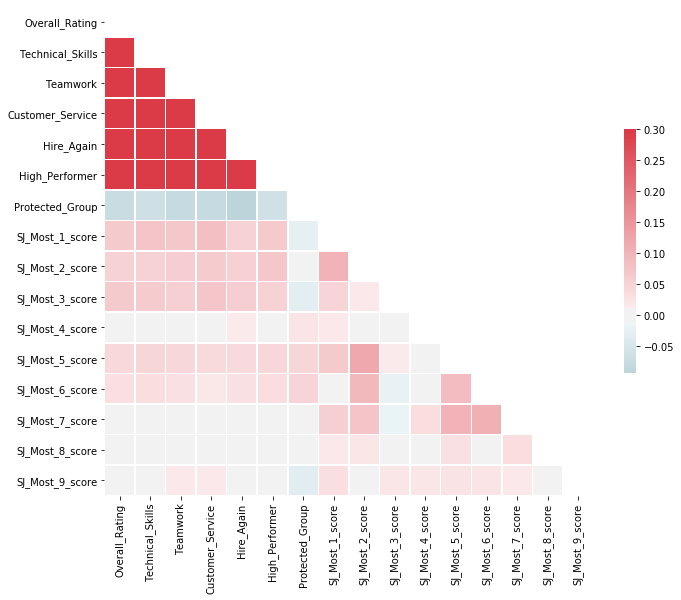

In [20]:
performanceCorr('SJ_Most')

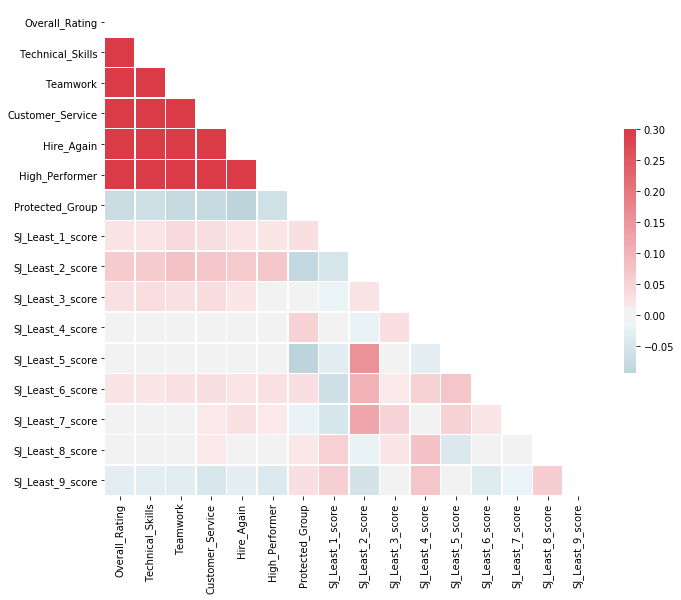

In [21]:
performanceCorr('SJ_Least')

In [ ]:
test.corr()
data_corr = test.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [93]:
def clusterWCSS(feat_regx, n_clusters):
    df = x.filter(regex="{}\d_\d_score".format(feat_regx), axis=1)
    print(df)
    wcss = []
    for i in range(1, n_clusters):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, n_jobs=8)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, n_clusters), wcss)
    plt.title('Elbow Graph')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

In [82]:
def clustering(feat_regx, n_clusters):
    df = x.filter(regex="{}\d_\d_score".format(feat_regx), axis=1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, n_jobs=8)
    kmeans.fit(df)
    pred = kmeans.predict(df)
    print(pred)
    return pred

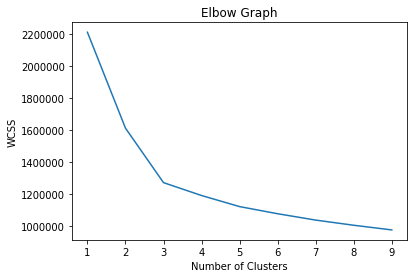

In [37]:
clusterWCSS('Biodata', 10)

In [39]:
clusters = clustering('Biodata', 3)

[2 2 2 ... 2 2 0]


In [40]:
clusters

array([2, 2, 2, ..., 2, 2, 0])

In [41]:
test = x.filter(regex='Biodata.*', axis=1)
test['cluster'] = clusters

C:\Users\Ian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test.groupby('cluster').mean().T

In [ ]:
test.groupby('cluster').count().T

       Scenario1_1_score  Scenario1_2_score  Scenario1_3_score  \
0                    0.0                0.0                0.0   
1                    0.0                0.0                0.0   
2                    0.0                0.0                0.0   
3                    0.0                0.0                0.0   
4                    0.0                1.0                0.0   
...                  ...                ...                ...   
44097                0.0                0.0                0.0   
44098                0.0                0.0                0.0   
44099                0.0                0.0                0.0   
44100                0.0                0.0                0.0   
44101                0.0                0.0                0.0   

       Scenario1_4_score  Scenario1_5_score  Scenario1_6_score  \
0                    0.0                0.0                0.0   
1                    0.0                0.0                0.0   
2        

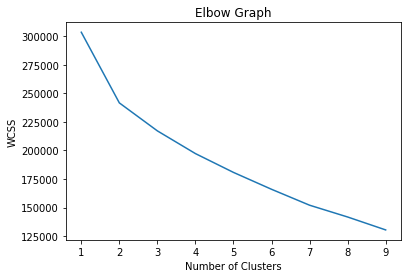

In [94]:
clusterWCSS('Scenario', 10)

In [98]:
clusters2 = clustering('Scenario', 2)

[0 0 0 ... 0 0 0]


In [99]:
test2 = x.filter(regex='Scenario\d_\d_score', axis=1)
test2['cluster'] = clusters2

C:\Users\Ian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
test2.groupby('cluster').mean().T

cluster,0,1
Scenario1_1_score,0.038661,0.602087
Scenario1_2_score,0.074249,0.693271
Scenario1_3_score,0.138841,1.251026
Scenario1_4_score,0.060261,2.162217
Scenario1_5_score,0.040384,0.617128
Scenario1_6_score,0.133238,1.261029
Scenario1_7_score,0.135134,0.944225
Scenario1_8_score,0.083787,2.182224
Scenario2_1_score,0.039404,1.914358
Scenario2_2_score,0.031650,2.134509


In [101]:
test2.groupby('cluster').count().T

cluster,0,1
Scenario1_1_score,42117,1985
Scenario1_2_score,42117,1985
Scenario1_3_score,42117,1985
Scenario1_4_score,42117,1985
Scenario1_5_score,42117,1985
Scenario1_6_score,42117,1985
Scenario1_7_score,42117,1985
Scenario1_8_score,42117,1985
Scenario2_1_score,42117,1985
Scenario2_2_score,42117,1985


In [116]:
corr2 = pd.DataFrame(clusters2).join(pd.DataFrame(x['Protected_Group']))

In [117]:
corr2.head(5)

,0,Protected_Group
0,0,0.0
1,0,1.0
2,0,1.0
3,0,0.0
4,0,0.0


In [118]:
corr2.crosstab(0).mean().T

,0,1
Protected_Group,0.303372,0.529975


In [121]:
pd.crosstab(corr2[0], corr2['Protected_Group'])

Protected_Group,0.0,1.0
0,,
0,29335,12775
1,933,1052
